# CNN for the american sign language alphabet 

#### Libraries  

In [ ]:
import os  #Directory made easier 
import tensorflow as tf #For building the neural network(Using tensorflow 2.0)
from tensorflow import keras  
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.utils import plot_model #For plotting the model structure
import numpy as np #For dataframe organisations
import pandas as pd #For dataframe organisations
import cv2 #Open sourced computer vision technology 
from matplotlib import pyplot as plt #For plotting 
import matplotlib.pyplot as plt #For plotting
import operator 
import sys
import pydot ##For plotting the model structure
import seaborn as sns; sns.set() #For making a confusion matrix 

#### Working Directory 

Please add your own directory below. The directory should lead into the data folder named Sign on your computer. 

In [ ]:
#Path to library 
#dir_path=os.chdir('/Users/Pia/Desktop/Sign')



#### Uploading the data  

In [2]:

#Loading testing data 
test = pd.read_csv('sign_mnist_test.csv')

#Loading training data 
train = pd.read_csv('sign_mnist_train.csv')


#### Checking how the data is structured 

In [167]:
test #Checking the test data 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [166]:
train #Checking the train data 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


#### Reorganize the data to fit into the neural network

In [6]:
#Get just the label column 
y_train = train['label'] 
y_test = test['label']

#Get everything but the label column (Just the pixel information)
X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

#Indexing data
X_train = np.array(X_train.iloc[:,:])

#Reshaping data
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

#Indexing data
X_test = np.array(X_test.iloc[:,:])


#Reshaping data
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

#Specifying number of classes ("26 letters of the aphabet")
num_classes = 26

#Reshaping data 
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)


#Reshaping to fit into CNN 
X_train = X_train.reshape((27455, 28, 28, 1)) #27455 is number of rows in the data. 28*28 is the shape of the img
X_test = X_test.reshape((7172, 28, 28, 1))


#### Creating the convolutional neural network with tenserflow 

In [3]:
#Setting up the CNN 

model = models.Sequential() #Seuential becuase I have just one input type and one output 
model.add(layers.Conv2D(8, (3, 3), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1))) #Convolutional layer
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2))) #Maxpooling layer
model.add(layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu')) #Convolutional layer
model.add(layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(layers.Dropout(0.3)) #Dropout layer
model.add(layers.Conv2D(8, (3, 3), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1))) #Convolutional layer
model.add(layers.MaxPooling2D((4, 4))) #Maxpooling layer
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(layers.Dense(128, activation='relu'))#Normal dense layer with relu activation
model.add(layers.Flatten()) #Flattining layer
model.add(layers.Dropout(0.4))
model.add(layers.Dense(26, activation='softmax')) #Normal dense layer with softmax activation



#### Printing the summary of the model layerse 

In [7]:
model.summary() #Make a summery of the model layers 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         1

#### fitting the model to the data 

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile model 

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test)) #50 iterations. 

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 28s 1ms/sample - loss: 3.0849 - accuracy: 0.1565 - val_loss: 2.3307 - val_accuracy: 0.2362
Epoch 2/50
27455/27455 [==============================] - 26s 961us/sample - loss: 1.9958 - accuracy: 0.3331 - val_loss: 2.1799 - val_accuracy: 0.2526
Epoch 3/50
27455/27455 [==============================] - 27s 967us/sample - loss: 1.6838 - accuracy: 0.4215 - val_loss: 1.8462 - val_accuracy: 0.3597
Epoch 4/50
27455/27455 [==============================] - 28s 1ms/sample - loss: 1.4797 - accuracy: 0.4775 - val_loss: 1.7672 - val_accuracy: 0.3738
Epoch 5/50
27455/27455 [==============================] - 22s 811us/sample - loss: 1.3422 - accuracy: 0.5259 - val_loss: 1.7257 - val_accuracy: 0.3868
Epoch 6/50
27455/27455 [==============================] - 22s 797us/sample - loss: 1.2281 - accuracy: 0.5646 - val_loss: 1.3406 - val_accuracy: 0.5244
Epoch 7/50
27455/27455 [=========================

#### Saving the model

In [17]:
model.save('/Users/Pia/Desktop/Sign')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /Users/Pia/Desktop/Sign/assets


#### Plotting the accuracy and loss for all 50 iterations 

Text(0.5, 1.0, 'Loss')

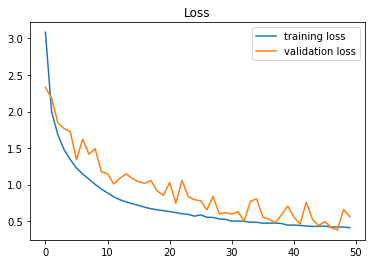

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['training loss', 'validation loss']);
plt.title('Loss')

Text(0.5, 1.0, 'Accuracy')

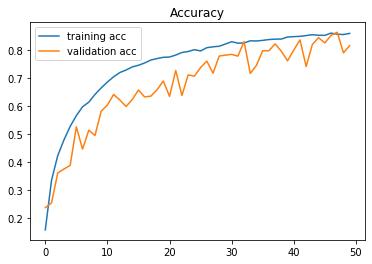

In [14]:

#Accuracy vizualized to check for overfitting 
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['training acc', 'validation acc']);
plt.title('Accuracy')

#### Plotting the model structure 

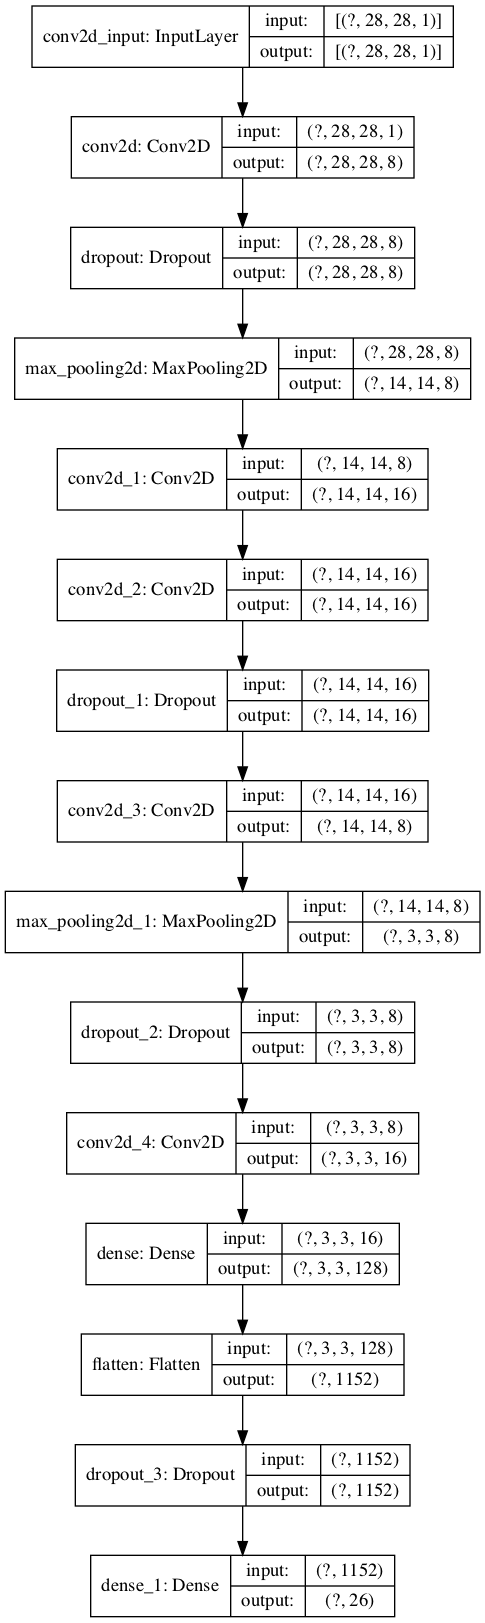

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Creating confusion matrix 

/Users/Pia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


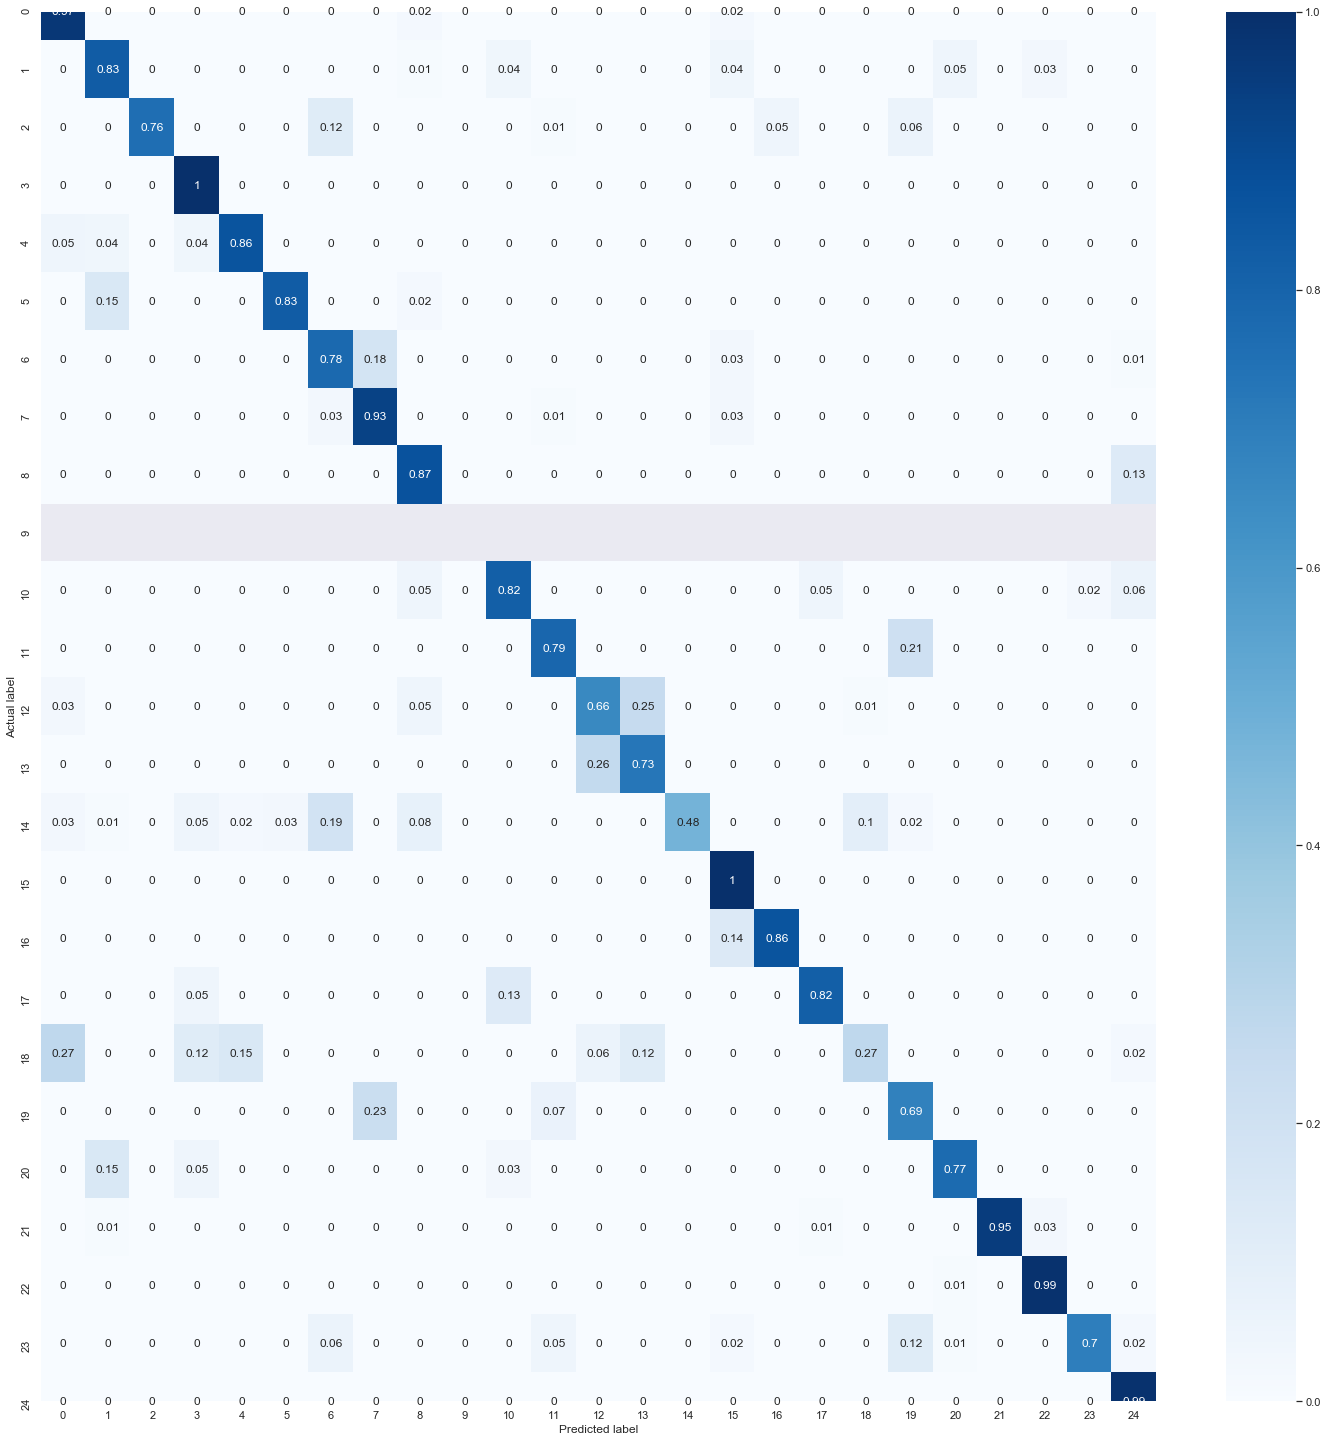

In [51]:

classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24] #25 letters, starting at 0, leaving out z

y_pred=model.predict_classes(X_test) #Getting the predicted values 
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy() #Comparing predicted values to lavels


con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)#Specifyng decimals and making values into floats (decimals)
 
con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes) #Make dataframe with classes on both the y and x axis


figure = plt.figure(figsize=(20, 20)) #Specify size of the matrix 
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues) #Type of plot 
plt.tight_layout() #Specify looks
plt.ylabel('Actual label') #Specify y label 
plt.xlabel('Predicted label') #Specify x label 
plt.show() #print 

# Prototype for finger spelling webcam translator 

#### Load the saved model 

In [53]:
loaded_model = model

#### Webcam translator 

In [ ]:
#Access webcam on computer
cap = cv2.VideoCapture(0)

# Category dictionary
categories = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: "h", 8: "i", 9: "j", 10: "k", 11: "l", 12:"m", 13: "n", 14: "o", 15: "p", 16: "q", 17: "r", 18: "s", 19: "t", 20: "u", 21: "v", 22: "w", 23:"x", 24:"y", 25: "z"}


while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 2)
    
    #Creating a frame in which to make the signs, so that the face and sign are not confused 
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.3*frame.shape[1])

    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,255,255) ,3) #Specifying shape and colour of the frame

    roi = frame[y1:y2, x1:x2]
    
    
    #Making a test window, where the region of interest frame is captured
    #It needs to be rezeiced like the sign langauge MNIST images fed into the CNN (They are 28 by 28 pixels)
    roi = cv2.resize(roi, (28, 28)) 
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) #Make image feed greyscale (For the region on interest square)
    #roi = cv2.medianBlur(roi,1) #Blur image a bit 
    test_image = cv2.adaptiveThreshold(roi,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,25,3) #Creating a test image for the region of interest square which is greyscale like the MNIST input
    cv2.imshow("test", test_image) #Make this a video feed too, so we can see what is out into the network  
    cv2.imshow("test", roi)
    
    #Give the region of intersted image to the CNN to predict what sign is being made 
    result = loaded_model.predict(roi.reshape(-1, 28, 28, 1))
    prediction = {'a': result[0][0], 
                  'b': result[0][1], 
                  'c': result[0][2],
                  'd': result[0][3],
                  'e': result[0][4],
                  'f': result[0][5],
                  'g': result[0][6], 
                  'h': result[0][7], 
                  'i': result[0][8],
                  'j': result[0][9],
                  'k': result[0][10],
                  'l': result[0][11],
                  'm': result[0][12], 
                  'n': result[0][13], 
                  'o': result[0][14],
                  'p': result[0][15],
                  'q': result[0][16],
                  'r': result[0][17],
                  's': result[0][18], 
                  't': result[0][19], 
                  'u': result[0][20],
                  'v': result[0][21],
                  'w': result[0][22],
                  'x': result[0][23],
                  'y': result[0][24],
                  'z': result[0][25]
                 } #All possible predctions and their translations 
    
    #Predict the most likely 
    prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
    
    # Write what the CNN is predicting in white in the top left corner of the video feed 
    cv2.putText(frame, prediction[0][0], (10, 120), cv2.FONT_HERSHEY_PLAIN, 8, (0,0,0), 5)    
    cv2.imshow("Frame", frame) #"print" this camera feed, so I can see it 
    
    interrupt = cv2.waitKey(10) #End camera feed by pressing esc in the command line. 
    if interrupt & 0xFF == 27: 
        break
        
 
cap.release()
cv2.destroyAllWindows() #Stop 